# Time Series Plot

### Dataset Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=[8,4]
plt.rcParams['figure.dpi']=140

In [4]:
df=pd.read_csv('daily-temperature.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [9]:
df.set_index('Date',inplace=True)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Line & Scatter Plot

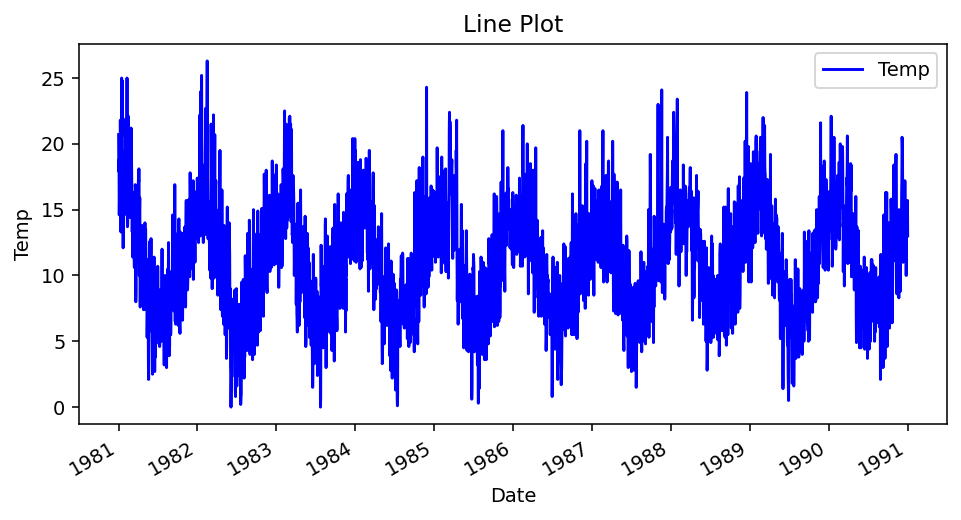

In [19]:
df.plot(color='b')
plt.ylabel('Temp')
plt.title('Line Plot')
plt.show()

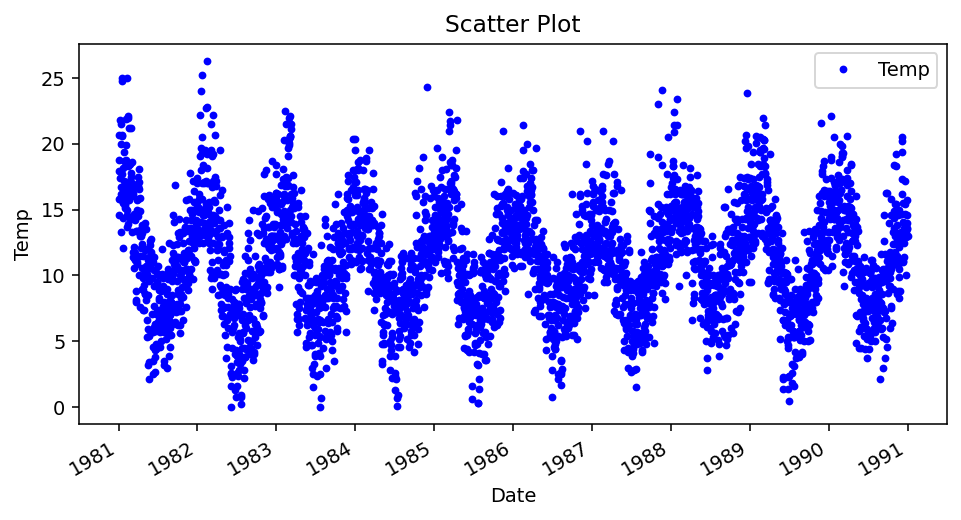

In [28]:
df.plot(style='.', color='b')
plt.ylabel('Temp')
plt.title('Scatter Plot')
plt.show()

### Subplots

In [29]:
groups=df.groupby(pd.Grouper(freq='A'))
groups

In [30]:
keys=groups.groups.keys()
keys

dict_keys([Timestamp('1981-12-31 00:00:00', freq='A-DEC'), Timestamp('1982-12-31 00:00:00', freq='A-DEC'), Timestamp('1983-12-31 00:00:00', freq='A-DEC'), Timestamp('1984-12-31 00:00:00', freq='A-DEC'), Timestamp('1985-12-31 00:00:00', freq='A-DEC'), Timestamp('1986-12-31 00:00:00', freq='A-DEC'), Timestamp('1987-12-31 00:00:00', freq='A-DEC'), Timestamp('1988-12-31 00:00:00', freq='A-DEC'), Timestamp('1989-12-31 00:00:00', freq='A-DEC'), Timestamp('1990-12-31 00:00:00', freq='A-DEC')])

In [32]:
groups.get_group('1981-12-31')

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1981-12-27,15.5
1981-12-28,13.3
1981-12-29,15.6


In [33]:
for key in keys:
    print(key)

1981-12-31 00:00:00
1982-12-31 00:00:00
1983-12-31 00:00:00
1984-12-31 00:00:00
1985-12-31 00:00:00
1986-12-31 00:00:00
1987-12-31 00:00:00
1988-12-31 00:00:00
1989-12-31 00:00:00
1990-12-31 00:00:00


In [38]:
years=pd.DataFrame()
for key in keys:
    years[key]=groups.get_group(key)['Temp'].values
years

,1981-12-31,1982-12-31,1983-12-31,1984-12-31,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,1990-12-31
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


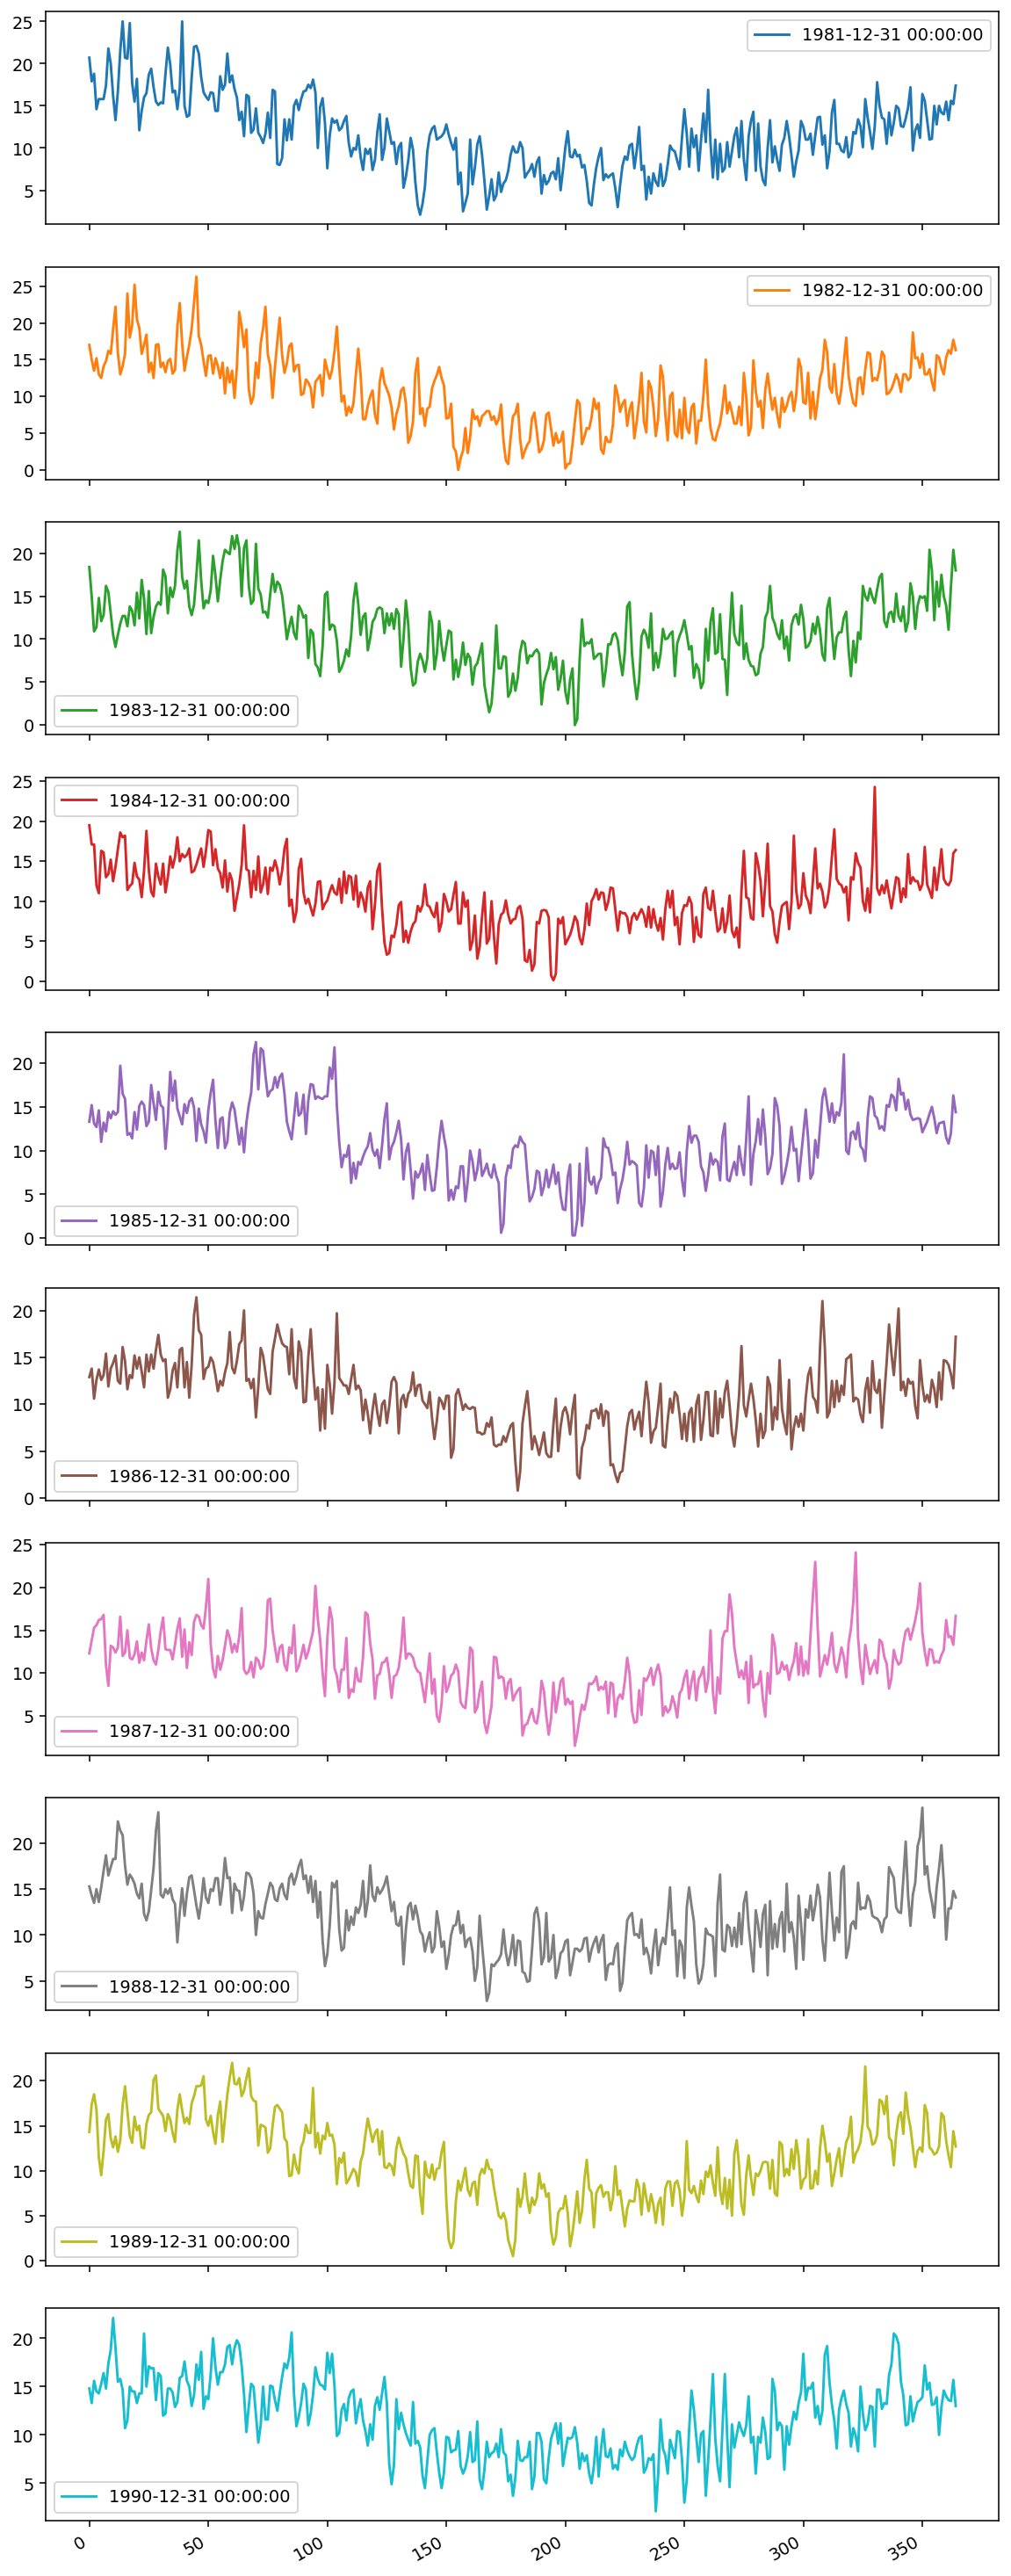

<Figure size 1120x560 with 0 Axes>

In [39]:
years.plot(subplots=True, figsize=(10,30))
plt.show()
plt.tight_layout()

### Heatmap

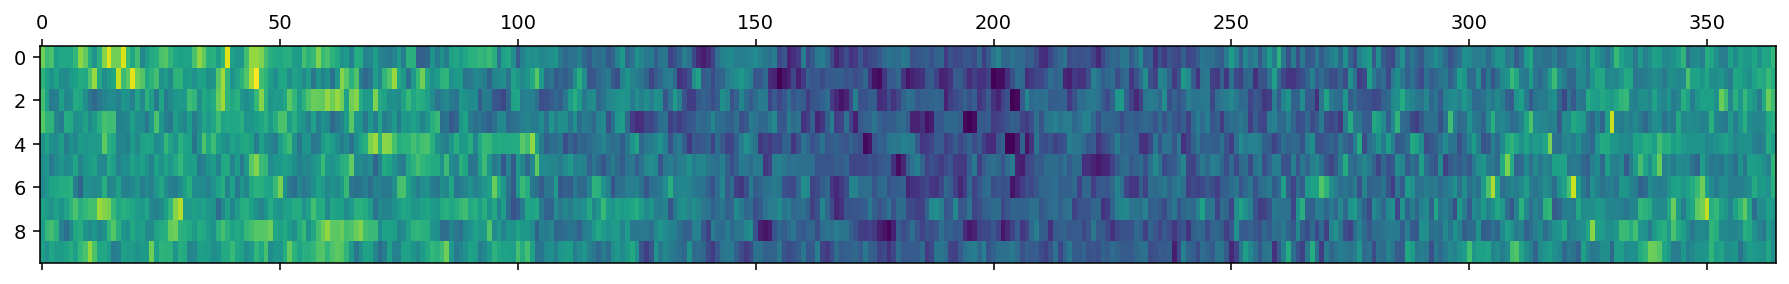

In [43]:
plt.matshow(years.T,aspect='auto')  # T is transpose.

### Histogram & KDE Plots

In [44]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Histogram

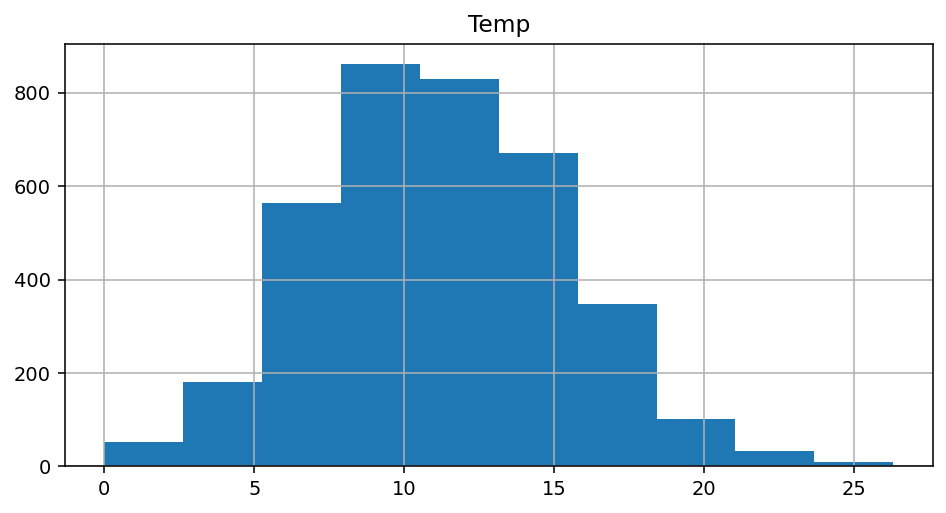

In [45]:
df.hist()
plt.show()

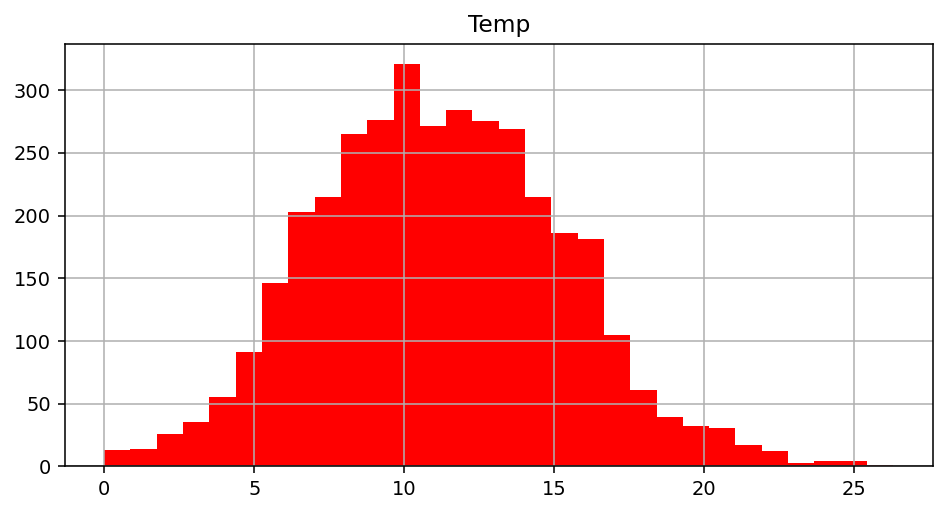

In [46]:
df.hist(bins=30, color='r')
plt.show()

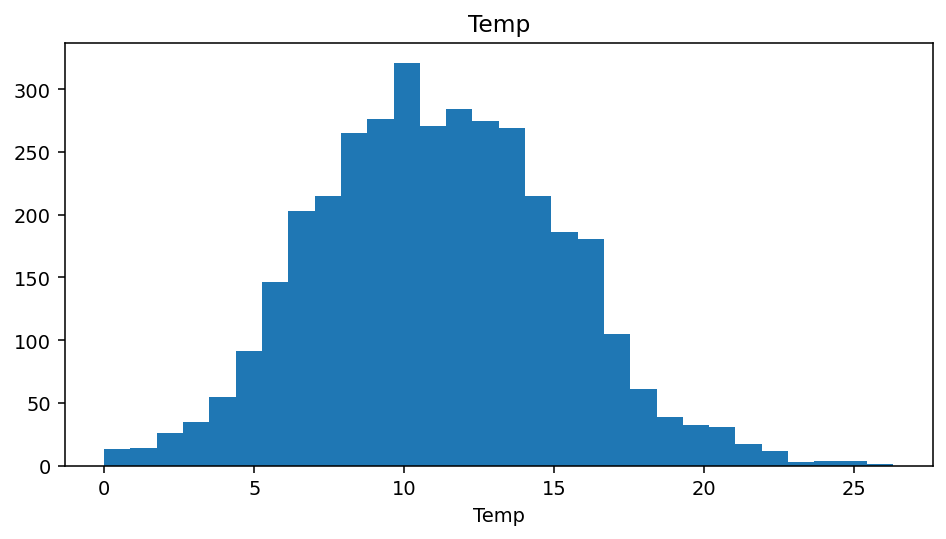

In [47]:
df.hist(bins=30, grid=False)
plt.xlabel('Temp')
plt.show()

KDE Plot

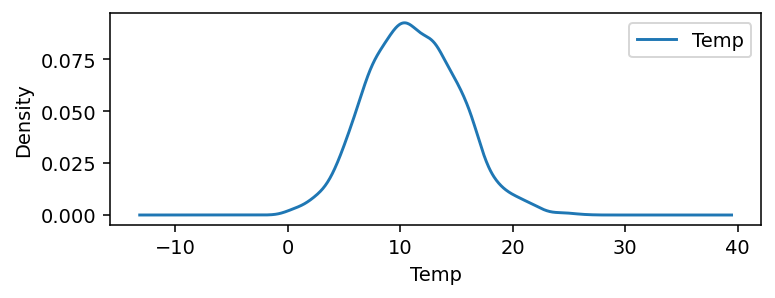

In [51]:
df.plot(kind='kde', figsize=(6,2))
plt.xlabel('Temp')
plt.show()